In [170]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [171]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [172]:
def GetLaguerre(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return sym.expand(poly,x)

In [173]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [174]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))
        except ZeroDivisionError:
            print('Zero Division')
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [175]:
def GetRoots(f,df,x,tolerancia = 10):
    Roots = np.array([])
    for i in x:
        root = GetNewton(f,df,i)
        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)
    Roots.sort()
    return Roots

In [176]:
def GetAllRootsGLag (n):
    xn = np.linspace(0,(n)+((n-1)*np.sqrt(n)),400)
    
    Laguerre = GetLaguerre(n,x)
    DLaguerre = GetDLaguerre(n,x)
        
    poly = sym.lambdify([x],Laguerre,'numpy')
    Dpoly = sym.lambdify([x],DLaguerre,'numpy')
    
    Roots = GetRoots(poly,Dpoly,xn)
    
    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
        
    return Roots

In [177]:
def GetWeightsGLag(n):
    Roots = GetAllRootsGLag(n)
    Laguerre = GetLaguerre(n+1,x)
    poly = sym.lambdify([x],Laguerre,'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots)**2))
    return Weights

In [178]:
GetAllRootsGLag(10)

array([ 0.13779347,  0.72945455,  1.8083429 ,  3.4014337 ,  5.55249614,
        8.33015275, 11.84378584, 16.27925783, 21.99658581, 29.92069701])

In [179]:
GetWeightsGLag(10)

array([3.08441118e-01, 4.01119929e-01, 2.18068288e-01, 6.20874561e-02,
       9.50151697e-03, 7.53008389e-04, 2.82592335e-05, 4.24931398e-07,
       1.83956482e-09, 9.91182722e-13])

In [180]:
def GetHermite(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 2*x
    else:
        poly = ((2*x)*GetHermite(n-1,x)-2*(n-1)*GetHermite(n-2,x))
    return sym.expand(poly,x)

In [181]:
def GetDHermite(n,x):
    Pn = GetHermite(n,x)
    return sym.diff(Pn,x,1)

In [182]:
def GetAllRootsGHer (n):
    xn = np.linspace(-np.sqrt(4*n+1),np.sqrt(4*n+1),100)

    Hermite = GetHermite(n,x)
    DHermite = GetDHermite(n,x)
    
    poly = sym.lambdify([x],Hermite,'numpy')
    Dpoly = sym.lambdify([x],DHermite,'numpy')
    
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [183]:
def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)
    
    Hermite = (GetHermite(n-1,x))
    
    poly = sym.lambdify([x],Hermite,'numpy')
    Weights = ((2**(n-1))*np.math.factorial(n)*np.sqrt(np.pi))/((n)**2*poly(Roots)**2)
    
    return Weights

In [186]:
m = 1
r = 8.314

In [187]:
def Demo(u):
    return np.sqrt(u)

In [205]:
roots = GetAllRootsGLag(10)
weights = GetWeightsGLag(10)
p = 0
for i in range(len(roots)):
    p += Demo(roots[i])*weights[i]
1.15473441*p

1.0271359113285963

Como coeficiente utilizamos la pista que le diste a Manuel por correo, como cual el resultado final era coeficiente*0.866 = 1, lo que significa que el coeficiente es 1.15473441. Hemos obtenido un valor relativamente cercano a 1 como valor de la integral aproximada por Gauss-Laguerre como resultado del uso de este coeficiente.

In [190]:
def P (v, T, M = m, R = r):
    return 4*np.pi*((M/(2*np.pi*R*T))**(3/2))*v**2*np.exp(-(M*v**2)/(2*np.pi*R*T))

In [219]:
v = np.linspace(0, 600, 1000)
T = np.linspace(100, 800, 10)

Text(0.5, 1.0, 'Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura')

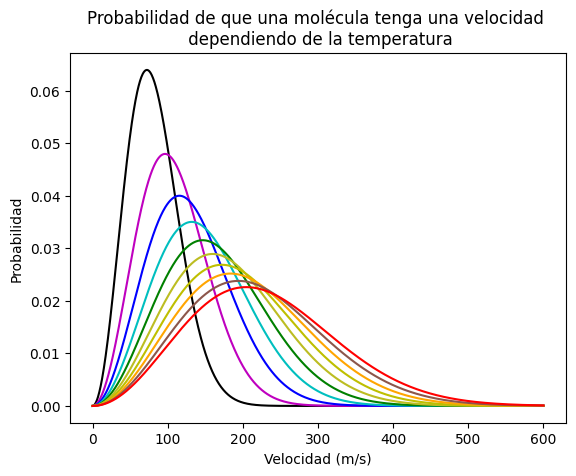

In [220]:
colores = []
for i in T:
    proba = P(v, i)
    if 'k' not in colores:
        plt.plot(v, proba, color = 'k')
        colores.append('k')
    elif 'm' not in colores:
        plt.plot(v, proba, color = 'm')
        colores.append('m')
    elif 'b' not in colores:
        plt.plot(v, proba, color = 'b')
        colores.append('b')
    elif 'c' not in colores:
        plt.plot(v, proba, color = 'c')
        colores.append('c')
    elif 'g' not in colores:
        plt.plot(v, proba, color = 'g')
        colores.append('g')
    elif 'tab:olive' not in colores:
        plt.plot(v, proba, color = 'tab:olive')
        colores.append('tab:olive')
    elif 'y' not in colores:
        plt.plot(v, proba, color = 'y')
        colores.append('y')
    elif 'orange' not in colores:
        plt.plot(v, proba, color = 'orange')
        colores.append('orange')
    elif 'tab:brown' not in colores:
        plt.plot(v, proba, color = 'tab:brown')
        colores.append('tab:brown')
    else:
        plt.plot(v, proba, color = 'r')
        colores.append('r')
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Probabilidad")
plt.title("Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura")

Como podemos ver, a mayor temperatura (Visible gracias al cambio de color, negro siendo la más baja y rojo siendo la más alta) mayor la velocidad promedio, pero menor su probabilidad máxima comparada con una temperatura menor. Es decir, a más temperatura, más extenso el rango de velocidades posibles para la partícula

In [193]:
m = 1
r = 8.314

In [238]:
def Probabilidad_Para_Gauss_Laguerre(v, T, M = m, R = r):
    return np.sqrt((M*(v**2))/(2*R*T))

In [239]:
def Vavg(v, T):
    return v*Probabilidad_Para_Gauss_Laguerre(v, T)

In [262]:
Vitesses_Moyennes = []
weights = GetWeightsGLag(10)
v = np.linspace(0, 600, len(weights))
for i in T:
    Vp = 1.15473441*sum(Vavg(v, i)*weights)
    Vitesses_Moyennes.append(Vp)  


In [252]:
Vavgteórica = np.array([])
for i in T:
    Vavgteórica = np.append(Vavgteórica, np.sqrt((8*r*i)/(np.pi*m)))

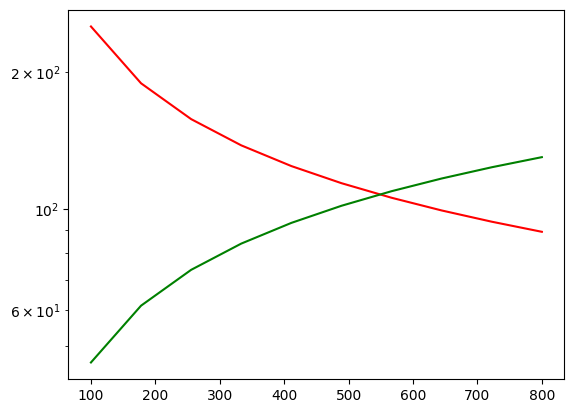

In [263]:
plt.plot(T, Vitesses_Moyennes, color ='r')
plt.plot(T, Vavgteórica, color = 'g')
plt.yscale('log')

Extrañamente, las funciones aparecen contrarias, aunque no tengan motivo de serlo. La única lógicamente atribuible sería un error en los pesos de Laguerre, que como resultado cambie la forma de la función de esta manera.

In [243]:
def Vrms(v, T):
    return (v**2)*Probabilidad_Para_Gauss_Laguerre(v, T)

In [244]:
Vitesses_Moyennes = []
weights = GetWeightsGLag(10)
v = np.linspace(0, 600, len(weights))
Vp = 0
for i in T:
    Vp = 1.15473441*sum(Vrms(v, i)*weights)
    Vitesses_Moyennes.append(np.sqrt(Vp))

In [245]:
Vrmsteórica = np.array([])
for i in T:
    Vrmsteórica = np.append(Vrmsteórica, np.sqrt((3*r*i)/(m)))

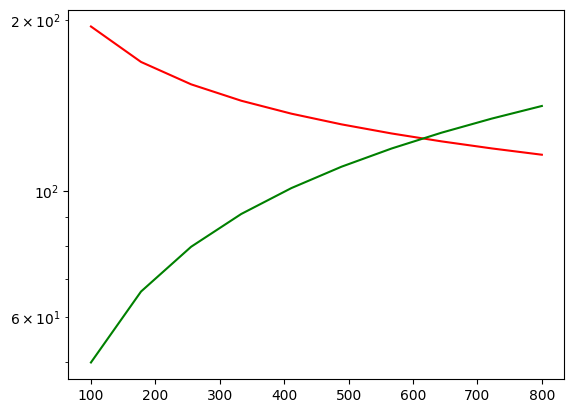

In [246]:
plt.plot(T, Vitesses_Moyennes, color ='r')
plt.plot(T, Vrmsteórica, color = 'g')
plt.yscale('log')